In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sensex_df = pd.read_csv("data/sensex.csv", index_col="Date")
dji_df = pd.read_csv("data/dji.csv", index_col="Date")

#### Convert index to datetime

In [3]:
sensex_df.index = pd.to_datetime(sensex_df.index)
dji_df.index = pd.to_datetime(dji_df.index)

#### Create common index

In [4]:
idx = dji_df.index.intersection(sensex_df.index)

#### Interpolate missing values by nearest neighbours

In [5]:
sensex_df = sensex_df.interpolate(method ='nearest', limit_direction ='forward')

In [6]:
sensex_df.drop(columns=['Volume', 'Adj Close'], inplace=True)

In [7]:
dji_df.drop(columns=['Volume', 'Adj Close'], inplace=True)

In [8]:
sensex_df.rename(columns={"Open": "Open_sensex", "High": "High_sensex", "Low": "Low_sensex", "Close": "Close_sensex"}, inplace=True)

In [16]:
result = pd.concat([dji_df, sensex_df], axis=1, join='inner')

In [17]:
result

,Open,High,Low,Close,Open_sensex,High_sensex,Low_sensex,Close_sensex
Date,,,,,,,,
1997-07-01,7678.000000,7748.339844,7667.359863,7722.299805,4263.109863,4301.770020,4247.660156,4300.859863
1997-07-02,7721.700195,7795.379883,7697.450195,7795.379883,4302.959961,4395.310059,4295.399902,4333.899902
1997-07-03,7797.000000,7896.259766,7796.970215,7895.799805,4335.790039,4393.290039,4299.970215,4323.459961
1997-07-07,7896.500000,7951.450195,7828.180176,7858.500000,4326.810059,4391.009766,4289.490234,4291.450195
1997-07-08,7858.000000,7962.310059,7857.129883,7962.299805,4285.649902,4313.000000,4252.490234,4306.390137
...,...,...,...,...,...,...,...,...
2020-02-27,26526.000000,26775.310547,25752.820313,25766.640625,39947.800781,39947.800781,39423.269531,39745.660156
2020-02-28,25270.830078,25494.240234,24681.009766,25409.359375,39087.468750,39087.468750,38219.968750,38297.289063
2020-03-02,25590.509766,26706.169922,25391.960938,26703.320313,38910.949219,39083.171875,37785.988281,38144.019531


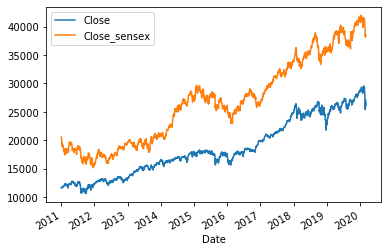

In [32]:
result[{"Close","Close_sensex"}].loc[(result.index.year>2010)].plot()

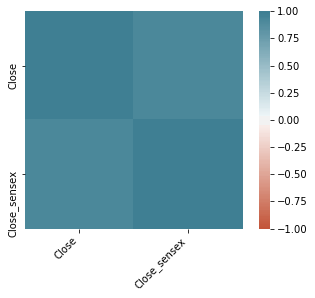

In [31]:
corr = result[{"Close","Close_sensex"}].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);